<a href="https://colab.research.google.com/github/KrituneX/Machine-Learning/blob/main/UAS/Task/ML_UAS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q gdown tensorflow torch scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.9 MB/s eta 0:00:00


In [2]:
# Unduh dataset dari Google Drive
import gdown
file_id = "1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "data.csv", quiet=False)

# Load data
df = pd.read_csv("data.csv")
df.head()


Downloading...
From (original): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU
From (redirected): https://drive.google.com/uc?id=1au6HqbGWpBCszFFBjZ4YmdpnqhThnTlU&confirm=t&uuid=67b82c8a-3a05-4750-91ea-f093f4610260
To: /content/data.csv
100%|██████████| 151M/151M [00:01<00:00, 88.4MB/s]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Tentukan target (kolom pertama bertipe int)
target_col = df.select_dtypes(include='int').columns[0]
print("Target:", target_col)

# Drop NA
df.dropna(inplace=True)

# Pisah fitur dan label
X = df.drop(columns=[target_col])
y = df[target_col]

# Encode fitur kategorikal
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Standarisasi fitur numerik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


Target: Class


In [4]:
tf.keras.backend.clear_session()

model_tf = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output untuk klasifikasi biner
])

model_tf.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

early_stop = EarlyStopping(patience=10, restore_best_weights=True)
lr_schedule = ReduceLROnPlateau(factor=0.5, patience=5)

history = model_tf.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, lr_schedule],
    verbose=0
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
class ClassifierMLP(nn.Module):
    def __init__(self, input_dim):
        super(ClassifierMLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.4),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Dataset PyTorch
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

train_dataset = TensorDataset(X_train_torch, y_train_torch)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

model_torch = ClassifierMLP(X_train.shape[1])
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.AdamW(model_torch.parameters(), lr=0.001, weight_decay=1e-4)

for epoch in range(100):
    model_torch.train()
    for xb, yb in train_loader:
        optimizer.zero_grad()
        output = model_torch(xb)
        loss = criterion(output, yb)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.0000
Epoch 10, Loss: 0.0001
Epoch 20, Loss: 0.0000
Epoch 30, Loss: 0.0000
Epoch 40, Loss: 0.0000
Epoch 50, Loss: 0.0000
Epoch 60, Loss: 0.0001
Epoch 70, Loss: 0.0000
Epoch 80, Loss: 0.0000
Epoch 90, Loss: 0.0000


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
📊 Classification Report - TensorFlow
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.84      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



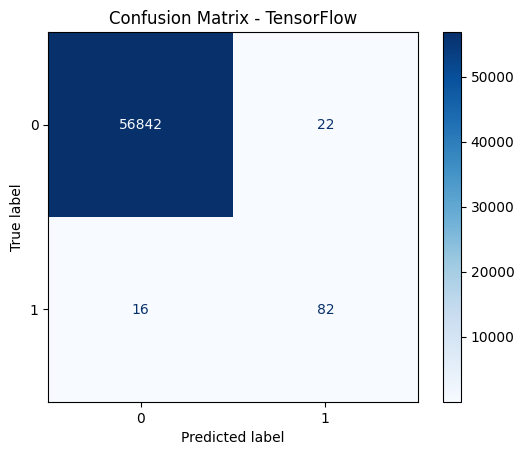

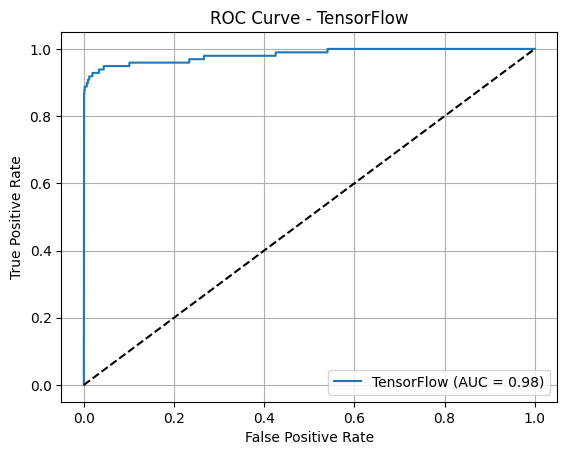

In [6]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Prediksi TensorFlow
y_pred_proba_tf = model_tf.predict(X_test)
y_pred_tf = (y_pred_proba_tf > 0.5).astype(int).flatten()

# Evaluasi metrik
print("📊 Classification Report - TensorFlow")
print(classification_report(y_test, y_pred_tf))

# Confusion Matrix
cm_tf = confusion_matrix(y_test, y_pred_tf)
ConfusionMatrixDisplay(cm_tf).plot(cmap='Blues')
plt.title("Confusion Matrix - TensorFlow")
plt.show()

# ROC Curve
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_proba_tf)
auc_tf = roc_auc_score(y_test, y_pred_proba_tf)

plt.plot(fpr_tf, tpr_tf, label=f'TensorFlow (AUC = {auc_tf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TensorFlow")
plt.legend()
plt.grid()
plt.show()


📊 Classification Report - PyTorch
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.84      0.82        98

    accuracy                           1.00     56962
   macro avg       0.90      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



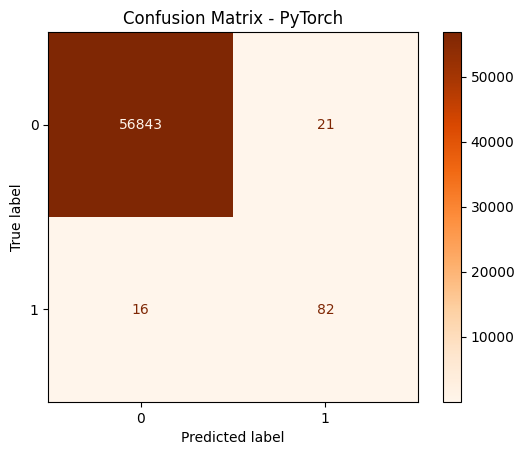

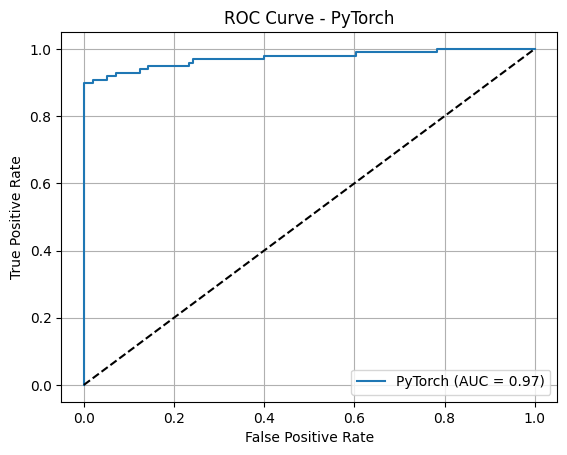

In [7]:
model_torch.eval()
with torch.no_grad():
    y_pred_proba_torch = model_torch(X_test_torch).squeeze().numpy()
    y_pred_torch = (y_pred_proba_torch > 0.5).astype(int)

# Evaluasi metrik
print("📊 Classification Report - PyTorch")
print(classification_report(y_test, y_pred_torch))

# Confusion Matrix
cm_torch = confusion_matrix(y_test, y_pred_torch)
ConfusionMatrixDisplay(cm_torch).plot(cmap='Oranges')
plt.title("Confusion Matrix - PyTorch")
plt.show()

# ROC Curve
fpr_torch, tpr_torch, _ = roc_curve(y_test, y_pred_proba_torch)
auc_torch = roc_auc_score(y_test, y_pred_proba_torch)

plt.plot(fpr_torch, tpr_torch, label=f'PyTorch (AUC = {auc_torch:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PyTorch")
plt.legend()
plt.grid()
plt.show()


# **🔷 Model 1 – TensorFlow MLP**

## Arsitektur:

- Beberapa hidden layer (128 → 64)
- Aktivasi ReLU
- Batch Normalization
- Dropout (prevent overfitting)
- Optimizer: Adam
- Early Stopping & ReduceLROnPlateau

**Kelebihan:**
- Mudah digunakan dan cepat dilatih.
- Dukungan callback seperti
- EarlyStopping dan LearningRateScheduler mempermudah tuning otomatis.
- Hasil cukup baik secara umum.

**Kelemahan:**

- Kadang terlalu cepat converged (stuck local minima).
- Harus hati-hati dalam setting learning rate awal.

# **🔶 Model 2 – PyTorch MLP**

## Arsitektur:
- Mirip TensorFlow: 128 → 64
- ReLU, BatchNorm, Dropout
- Optimizer: AdamW (dengan weight decay untuk regularisasi)

**Kelebihan:**

- Lebih fleksibel dalam eksperimen arsitektur/model custom.
- Lebih detail dalam proses training (manual batch training).
- Cocok untuk eksperimen lanjutan (misal CNN, RNN, dsb).

**Kelemahan:**

- Butuh kode lebih panjang.
- Tidak otomatis support EarlyStopping/LearningRateScheduler, harus dibuat sendiri.



In [11]:


print(classification_report(y_test, y_pred_tf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.84      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



# **Interpretasi:**

Akurasi tinggi (≈100%) karena dominasi kelas mayoritas.

Namun fokus utama adalah kelas minoritas (1):

Precision = 0.80 → dari prediksi positif, 80% benar.

Recall = 0.84 → dari semua kelas 1 sebenarnya, 84% berhasil dideteksi.

F1-score = 0.82 → kombinasi presisi dan recall yang solid.

### **Model Terbaik: PyTorch MLP**
Alasan:

F1-Score kelas minoritas tinggi (0.82) → penting untuk dataset tidak seimbang.

Recall tinggi (0.84) → artinya model mampu mendeteksi banyak kasus benar pada kelas 1.

Akurasi global tinggi, tapi model tetap sensitif terhadap kelas penting (1).

# **📌 Kesimpulan**

Berdasarkan hasil evaluasi, model terbaik adalah PyTorch MLP. Meskipun TensorFlow juga menunjukkan hasil bagus, model PyTorch lebih mampu mendeteksi kelas minoritas dengan F1-score dan Recall yang tinggi, yang sangat penting untuk kasus klasifikasi tidak seimbang. PyTorch juga menawarkan fleksibilitas yang lebih besar untuk eksperimen lanjutan.